In [75]:
# Note: Clustering is not great on this data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

scaledFeatures = pd.read_csv("../../data/sets/insurance_features_scaled.csv")
maxClusters = 15

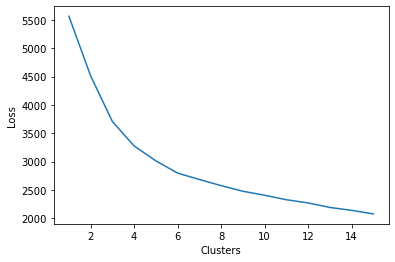

In [76]:
### Elbow method for KMeans ###

losses = []
for i in range(1, maxClusters + 1):
    km = KMeans(n_clusters = i)
    km.fit(scaledFeatures)
    losses.append(km.inertia_)

plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

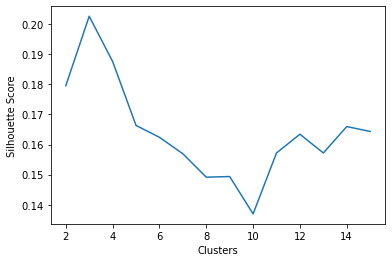

In [79]:
### Silhouette analysis for KMeans ###

scores = []
for i in range(2, maxClusters + 1):
    km = KMeans(n_clusters = i)
    km.fit(scaledFeatures)
    score = silhouette_score(scaledFeatures, km.labels_)
    scores.append(score)

plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

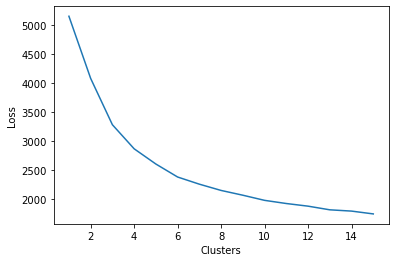

In [80]:
### Elbow method for KPrototypes ###

losses = []
for i in range(1, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    losses.append(kp.cost_)

plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

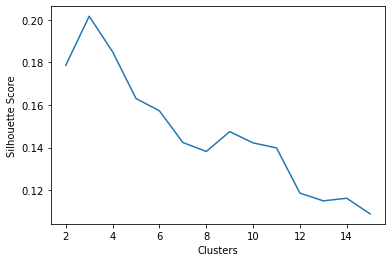

In [81]:
### Silhouette analysis for KPrototypes ###

scores = []
for i in range(2, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    score = silhouette_score(scaledFeatures, kp.labels_)
    scores.append(score)

plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [82]:
### Analyze KMeans clustering statistics ###

clusterCount = 3
cleanInsurance = pd.read_csv("../../data/sets/insurance_clean.csv")

km = KMeans(n_clusters = clusterCount)
clusters = km.fit_predict(scaledFeatures)

cleanInsurance["Cluster"] = clusters
for i in range(clusterCount):
    clusterFilter = cleanInsurance["Cluster"] == i
    clusterData = cleanInsurance[clusterFilter]
    print("Cluster " + str(i))
    print(clusterData.describe())

Cluster 0
              age         sex         bmi    children      smoker      region  \
count  456.000000  456.000000  456.000000  456.000000  456.000000  456.000000   
mean    52.725877    0.484649   31.479682    0.436404    0.177632    1.445175   
std      7.252242    0.500313    5.979218    0.566764    0.382622    1.092059   
min     37.000000    0.000000   18.050000    0.000000    0.000000    0.000000   
25%     47.000000    0.000000   27.051250    0.000000    0.000000    0.000000   
50%     53.000000    0.000000   31.397500    0.000000    0.000000    1.000000   
75%     59.000000    1.000000   35.970000    1.000000    0.000000    2.000000   
max     64.000000    1.000000   49.060000    2.000000    1.000000    3.000000   

            charges  Cluster  
count    456.000000    456.0  
mean   16032.473706      0.0  
std    11589.930606      0.0  
min     5397.616700      0.0  
25%     8956.066413      0.0  
50%    11705.004525      0.0  
75%    15072.401050      0.0  
max    63770

In [83]:
### Analyze KPrototypes clustering statistics ###

clusterCount = 3
cleanInsurance = pd.read_csv("../../data/sets/insurance_clean.csv")

kp = KPrototypes(n_clusters = clusterCount, init = "Cao")
clusters = kp.fit_predict(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])

cleanInsurance["Cluster"] = clusters
for i in range(clusterCount):
    clusterFilter = cleanInsurance["Cluster"] == i
    clusterData = cleanInsurance[clusterFilter]
    print("Cluster" + str(i))
    print(clusterData.describe())

Cluster0
              age        sex         bmi    children      smoker      region  \
count  490.000000  490.00000  490.000000  490.000000  490.000000  490.000000   
mean    25.746939    0.52449   29.621653    0.434694    0.214286    1.465306   
std      6.746145    0.49991    6.026414    0.593782    0.410745    1.103916   
min     18.000000    0.00000   15.960000    0.000000    0.000000    0.000000   
25%     19.000000    0.00000   25.740000    0.000000    0.000000    1.000000   
50%     24.000000    1.00000   29.157500    0.000000    0.000000    1.000000   
75%     31.000000    1.00000   33.606250    1.000000    0.000000    2.000000   
max     43.000000    1.00000   53.130000    2.000000    1.000000    3.000000   

            charges  Cluster  
count    490.000000    490.0  
mean    9518.970835      0.0  
std    11582.418589      0.0  
min     1121.873900      0.0  
25%     2218.062175      0.0  
50%     3812.321525      0.0  
75%    14676.780550      0.0  
max    58571.074480   